In [2]:
! pip install snscrape

Defaulting to user installation because normal site-packages is not writeable


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Gurdaan Walia\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\Gurdaan Walia\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 247, in wrapper
    return func(self, options, args)
  File "C:\Users\Gurdaan Walia\AppData\Roaming\Python\Python39\site-packages\pip\_internal\commands\install.py", line 345, in run
    session = self.get_default_session(options)
  File "C:\Users\Gurdaan Walia\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 98, in get_default_session
    self._session = self.enter_context(self._build_session(options))
  File "C:\Users\Gurdaan Walia\AppData\Roaming\Python\Python39\site-packages\pip\_internal\cli\req_command.py", line 125, in _build_session
    session = PipSession(
  File "C:\Users\Gurdaan Walia\AppData\Roamin

In [223]:
! pip install --upgrade emoji

Defaulting to user installation because normal site-packages is not writeable
  Using cached emoji-2.2.0-py3-none-any.whl
  Attempting uninstall: emoji
    Found existing installation: emoji 1.7.0
    Uninstalling emoji-1.7.0:
      Successfully uninstalled emoji-1.7.0


# Collecting and Saving Data

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import datetime, timedelta
#'Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'Appl', 'Goog', 
stocks = ['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'Appl', 'Goog','Yhoo']
start_date = datetime(2023, 2, 1)
end_date = datetime(2023, 2, 7)

for stock in stocks:
    for i in range((end_date - start_date).days + 1):
        date = start_date + timedelta(days=i)
        tweets = []
        while len(tweets) < 2000:
            query = f"(#{stock} OR #{stock.lower()} OR #{stock.upper()}) lang:en since:{date.strftime('%Y-%m-%d')} until:{(date + timedelta(days=1)).strftime('%Y-%m-%d')}"
            print(type(sntwitter.TwitterSearchScraper(query).get_items()))     
            for tweet in sntwitter.TwitterSearchScraper(query).get_items():
                if tweet.lang == 'en':
                    tweets.append([tweet.date, tweet.id, tweet.user.username, tweet.content])
                if len(tweets) >= 2000:
                    break
             
        df = pd.DataFrame(tweets, columns=['Date', 'ID', 'username', 'tweet'])
        df.to_csv(f"{stock}_{date.strftime('%Y-%m-%d')}.csv", index=False)


ModuleNotFoundError: No module named 'filelock'

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Altcoin_df=pd.read_csv("Altcoin_7days.csv")
Bitcoin_df=pd.read_csv("Bitcoin_7days.csv")
Coindesk_df=pd.read_csv("Coindesk_7days.csv")
Cryptocurrency_df=pd.read_csv("Cryptocurrency_7days.csv")
Gold_df=pd.read_csv("Gold_7days.csv")
Appl_df=pd.read_csv("Appl_7days.csv")
Goog_df=pd.read_csv("Goog_7days.csv")
Yhoo_df=pd.read_csv("Yhoo_7days.csv")

In [239]:
# Clubing all dataframes together

df_list=[Altcoin_df,Bitcoin_df,Coindesk_df,Cryptocurrency_df,Gold_df,Appl_df,Goog_df,Yhoo_df]
df_list_name=["Altcoin_df","Bitcoin_df","Coindesk_df","Cryptocurrency_df","Gold_df","Appl_df","Goog_df","Yhoo_df"]
index=0
for dataframes in df_list:
    dataframes["tag"]=df_list_name[index]
    index+=1
merged_df = pd.concat(df_list)
merged_df.to_csv("merged.csv")

In [240]:
merged_df.head()

,Unnamed: 0,Date,ID,username,tweet,tag
0,0,2023-02-01 23:59:48+00:00,1620934977591578624,Santiment_VN,🤑#Fed đã làm điều mà họ mong đợi nhất ngày hôm...,Altcoin_df
1,1,2023-02-01 23:59:04+00:00,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin_df
2,2,2023-02-01 23:59:04+00:00,1620934790584352768,ruhul180,The treasury will also be used to fund new Red...,Altcoin_df
3,3,2023-02-01 23:59:00+00:00,1620934773438042114,BigEyesCoin,🙀ONLY 48 HOURS LEFT TO CLAIM YOUR 200% BONUS O...,Altcoin_df
4,4,2023-02-01 23:57:17+00:00,1620934344947961856,kriptoskapital,Kapitalin ekibi farklıdır. İçi boş iş yapmam. ...,Altcoin_df


In [241]:
merged_df.tag.unique()

array(['Altcoin_df', 'Bitcoin_df', 'Coindesk_df', 'Cryptocurrency_df',
       'Gold_df', 'Appl_df', 'Goog_df'], dtype=object)

In [242]:
merged_df.shape

(28615, 6)

In [243]:
# convert review_date to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# extract year, month, and day
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month
merged_df['day'] = merged_df['Date'].dt.day

# Dropping Date Column
merged_df.drop(columns=["Date"],inplace=True)

merged_df.head()

,Unnamed: 0,ID,username,tweet,tag,year,month,day
0,0,1620934977591578624,Santiment_VN,🤑#Fed đã làm điều mà họ mong đợi nhất ngày hôm...,Altcoin_df,2023,2,1
1,1,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin_df,2023,2,1
2,2,1620934790584352768,ruhul180,The treasury will also be used to fund new Red...,Altcoin_df,2023,2,1
3,3,1620934773438042114,BigEyesCoin,🙀ONLY 48 HOURS LEFT TO CLAIM YOUR 200% BONUS O...,Altcoin_df,2023,2,1
4,4,1620934344947961856,kriptoskapital,Kapitalin ekibi farklıdır. İçi boş iş yapmam. ...,Altcoin_df,2023,2,1


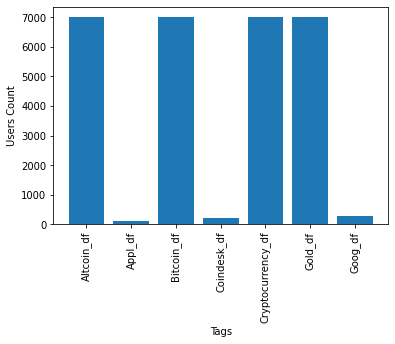

In [244]:
grouped_data = merged_df.groupby('tag')['username'].count()

plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Users Count')
plt.show()


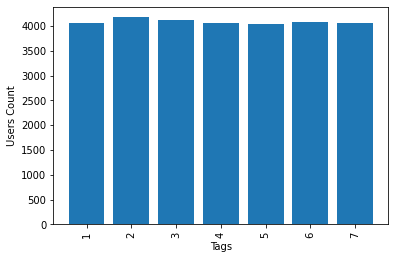

In [245]:
grouped_data = merged_df.groupby('day')['username'].count()

plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Users Count')
plt.show()


In [226]:
import regex as re
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import emoji

eng_stop_words = list(stopwords.words('english'))

def remove_emoji(text):
    text = emoji.demojize(text)
    text = re.sub(':[a-z_]+:', '', text)
    return text

def ProcessedTweets(text):
    
    #changing tweet text to small letters
    text = text.lower()
    
    # Removing @ and links 
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", text).split())
    
    # removing repeating characters
    text = re.sub(r'\@\w+|\#\w+|\d+', '', text)
    
    # removing punctuation and numbers
    punct = str.maketrans('', '', string.punctuation+string.digits)
    text = text.translate(punct)
    
    # tokenizing words and removing stop words from the tweet text
    tokens = word_tokenize(text)  
    filtered_words = [w for w in tokens if w not in eng_stop_words]
    
    # removing emoji codes from the tweet text
    filtered_words = [remove_emoji(w) for w in filtered_words]
    
    # removing words with length less than 2
    filtered_words=[w for w in filtered_words if len(w)>2]
    
    # lemmetizing words
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    text = " ".join(lemma_words)
    return text


In [227]:
merged_df['Processed_Tweets'] = merged_df['tweet'].apply(ProcessedTweets)
merged_df.head()

,Unnamed: 0,ID,username,tweet,tag,year,month,day,Processed_Tweets
0,0,1620934977591578624,Santiment_VN,🤑#Fed đã làm điều mà họ mong đợi nhất ngày hôm...,Altcoin_df,2023,2,1,:money-mouth_face: làm điều mong đợi nhất ngày...
1,1,1620934790836019200,BNB_Tracker,#BinanceCoin price update: $BNB\n\n#BNB $317.1...,Altcoin_df,2023,2,1,price update bnb usd btc eth follow recent bnb...
2,2,1620934790584352768,ruhul180,The treasury will also be used to fund new Red...,Altcoin_df,2023,2,1,treasury also used fund new red falcon product...
3,3,1620934773438042114,BigEyesCoin,🙀ONLY 48 HOURS LEFT TO CLAIM YOUR 200% BONUS O...,Altcoin_df,2023,2,1,only hour left claim bonus big puuurchase code...
4,4,1620934344947961856,kriptoskapital,Kapitalin ekibi farklıdır. İçi boş iş yapmam. ...,Altcoin_df,2023,2,1,kapitalin ekibi farklıdır i̇çi yapmam gecenin ...


In [228]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"  

In [230]:
# using the functions to get the polarity and sentiment
import textblob
from textblob import TextBlob

merged_df['Polarity'] = merged_df['Processed_Tweets'].apply(polarity)
merged_df['Sentiment'] = merged_df['Polarity'].apply(sentimenttextblob)
sent = merged_df['Sentiment'].value_counts()
sent

Neutral     17095
Positive     9145
Negative     2375
Name: Sentiment, dtype: int64

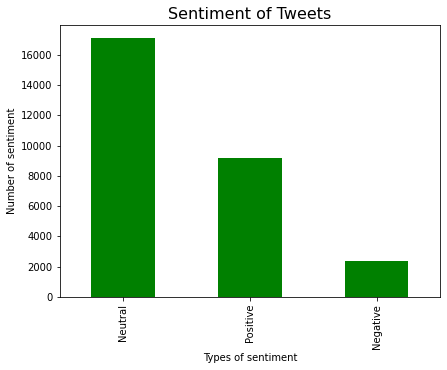

In [231]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['green'], figsize=(15,5))
plt.title('Sentiment of Tweets', fontsize=16)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

In [232]:
tweets_string = merged_df['Processed_Tweets'].tolist()
tweets_string = " ".join(tweets_string)

In [236]:
! pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 153.1/153.1 kB 1.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


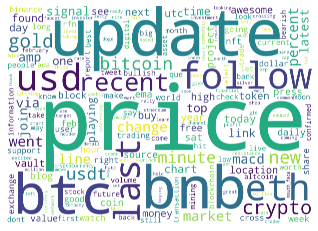

In [237]:
# Displaying the most talked about word in a word cloud 
# some stop words were still evident but was removed during visualization on Power BI
# Instantiate the Twitter word cloud object

from wordcloud import WordCloud, STOPWORDS

w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000).generate(tweets_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()